In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline

In [137]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.shape

(7613, 5)

### EDA

In [26]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
train_df.keyword.value_counts()[:5]

fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: keyword, dtype: int64

In [28]:
train_df.fillna("missing",inplace=True)
test_df.fillna("missing",inplace=True)

In [29]:
train_df.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [30]:
train_df.location.value_counts()[:5]

missing          2533
USA               104
New York           71
United States      50
London             45
Name: location, dtype: int64

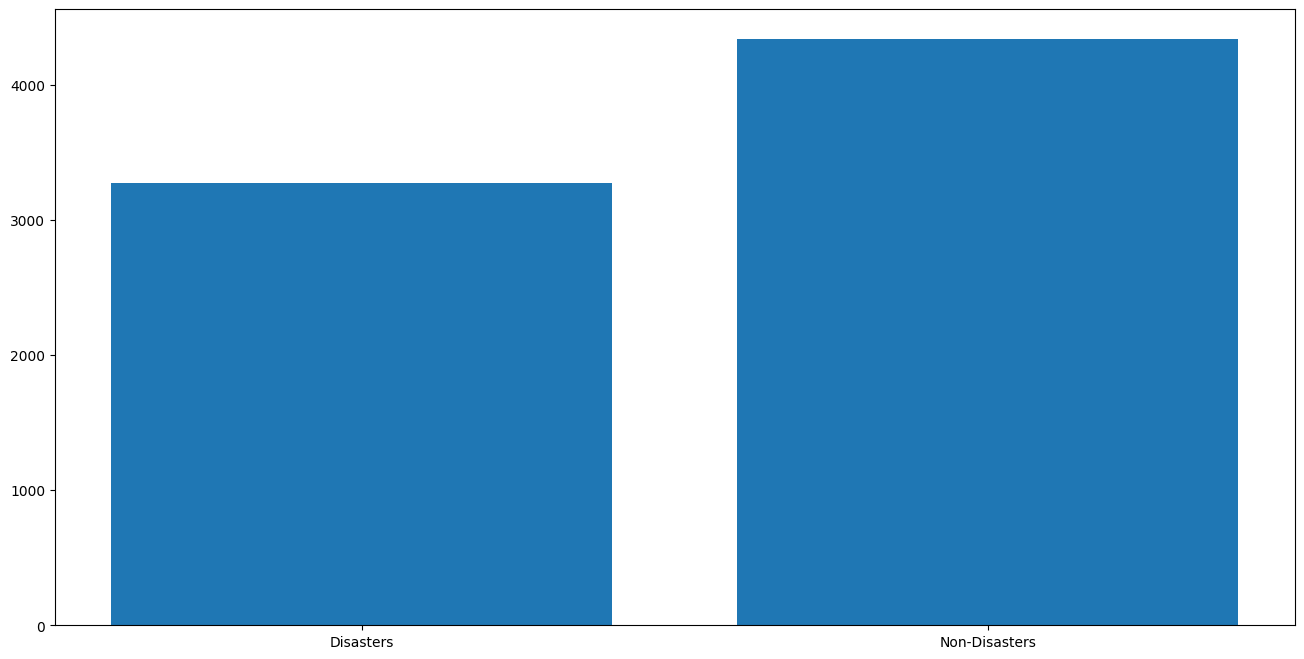

In [31]:
disasters = train_df[train_df.target == 1].shape[0]
non_disasters = train_df[train_df.target == 0].shape[0]

plt.figure(figsize=(16,8))
plt.bar(["Disasters","Non-Disasters"], [disasters,non_disasters]);

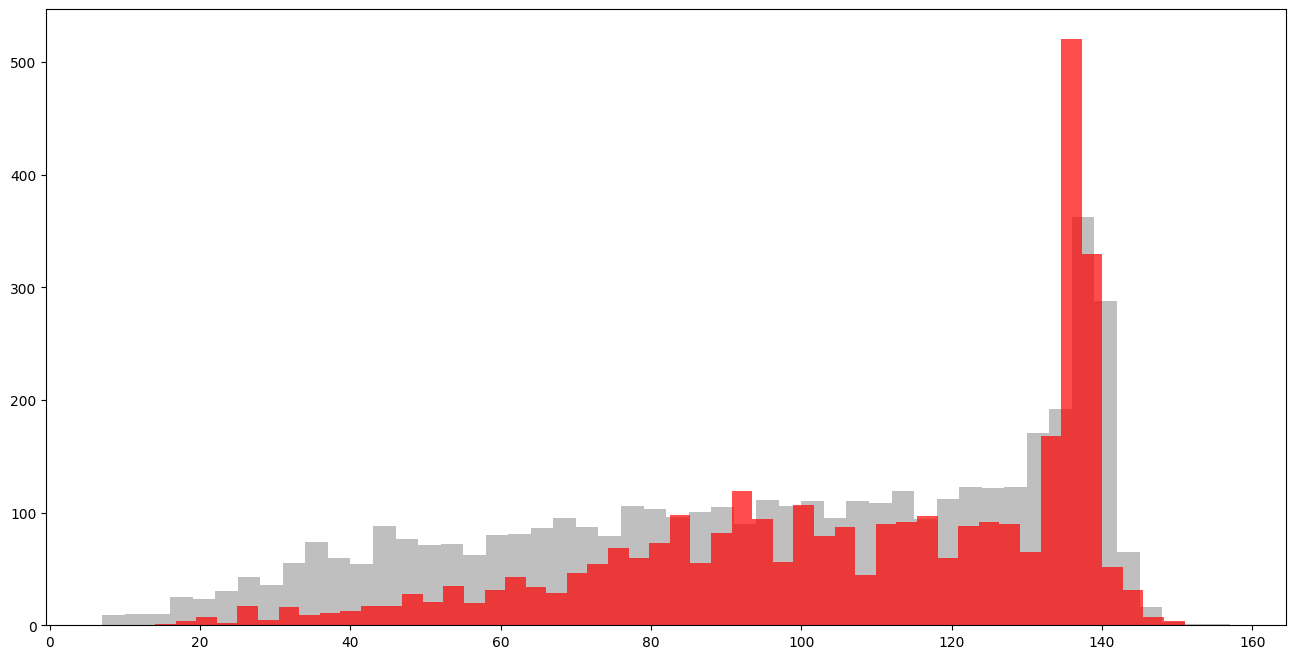

In [32]:
def plot_target_based_features(feature):
    x1 = train_df[train_df.target == 1][feature]
    x2 = train_df[train_df.target == 0][feature]
    plt.figure(figsize=(16,8))
    plt.hist(x2,alpha=0.5,color="grey",bins=50)
    plt.hist(x1,alpha=0.7,color="red",bins=50)
    
train_df["text_len"] = train_df.text.map(lambda x: len(x))
plot_target_based_features("text_len")

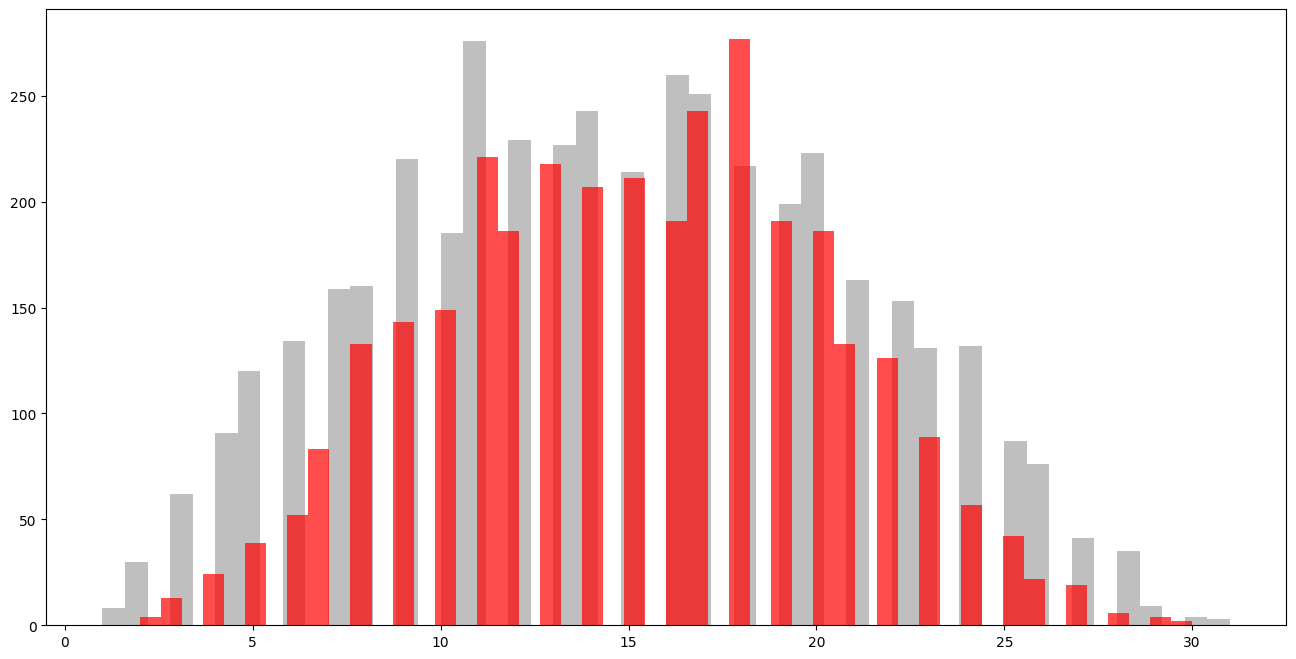

In [33]:
train_df["words_count"] = train_df.text.str.split().map(lambda x: len(x))
plot_target_based_features("words_count")

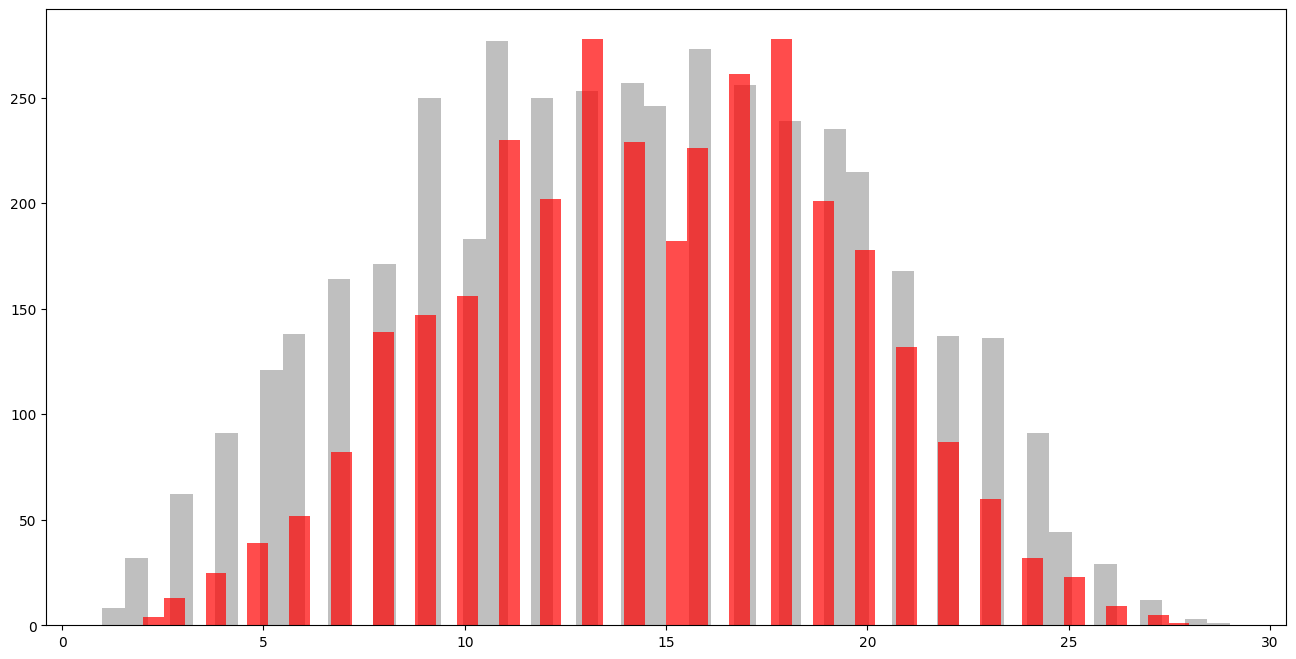

In [34]:
train_df["unique_word_count"] = train_df.text.map(lambda x:len(set(str(x).split())))
plot_target_based_features("unique_word_count")

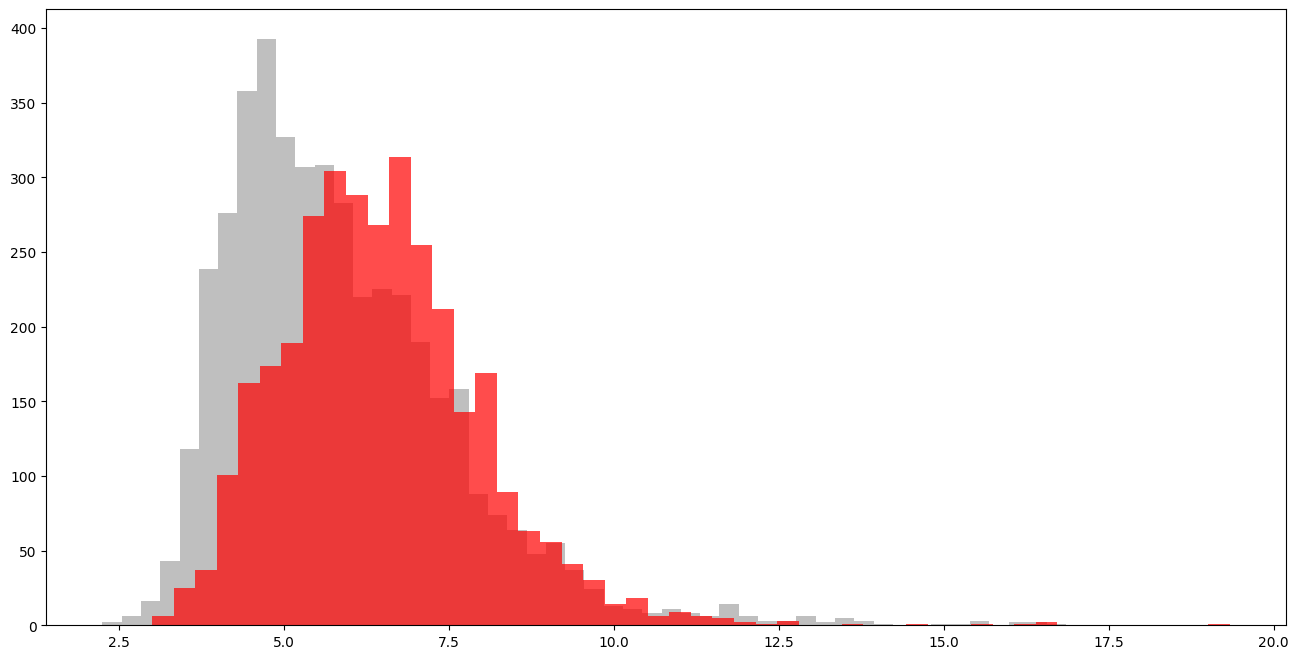

In [35]:
train_df["mean_word_length"] = train_df.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)
plot_target_based_features("mean_word_length")

In [36]:
train_df.head()

,id,keyword,location,text,target,text_len,words_count,unique_word_count,mean_word_length
0,1,missing,missing,Our Deeds are the Reason of this #earthquake M...,1,69,13,13,4.384615
1,4,missing,missing,Forest fire near La Ronge Sask. Canada,1,38,7,7,4.571429
2,5,missing,missing,All residents asked to 'shelter in place' are ...,1,133,22,20,5.090909
3,6,missing,missing,"13,000 people receive #wildfires evacuation or...",1,65,8,8,7.125000
4,7,missing,missing,Just got sent this photo from Ruby #Alaska as ...,1,88,16,15,4.500000


### N-gram analysis

In [37]:
from nltk.corpus import stopwords

def generate_ngrams(text, n_gram=1, stop=True):
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]

    return ngrams

In [38]:
generate_ngrams("  Resource stopwords not found.   Please use the NLTK Downloader to obtain the resource:")

['resource',
 'stopwords',
 'found.',
 'please',
 'use',
 'nltk',
 'downloader',
 'obtain',
 'resource:']

### Create unigrams

In [39]:
from collections import defaultdict

In [40]:
disaster_unigrams = defaultdict(int)
nondisasters_unigrams = defaultdict(int)

In [41]:
for text in train_df[train_df.target == 1].text:
    for word in generate_ngrams(text):
        disaster_unigrams[word] += 1
for text in train_df[train_df.target == 0].text:
    for word in generate_ngrams(text):
        nondisasters_unigrams[word] += 1

In [44]:
df_disaster_unigrams = pd.DataFrame(
    sorted(disaster_unigrams.items(),key=lambda x: x[1],reverse=True)
)
df_nondisaster_unigrams = pd.DataFrame(
    sorted(nondisasters_unigrams.items(), key=lambda x: x[1], reverse=True)
)

In [52]:
sorted(disaster_unigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('-', 389),
 ('fire', 150),
 ('via', 117),
 ('&amp;', 105),
 ('...', 105),
 ('suicide', 103),
 ('disaster', 97),
 ('people', 93),
 ('police', 93),
 ('killed', 92)]

<BarContainer object of 10 artists>

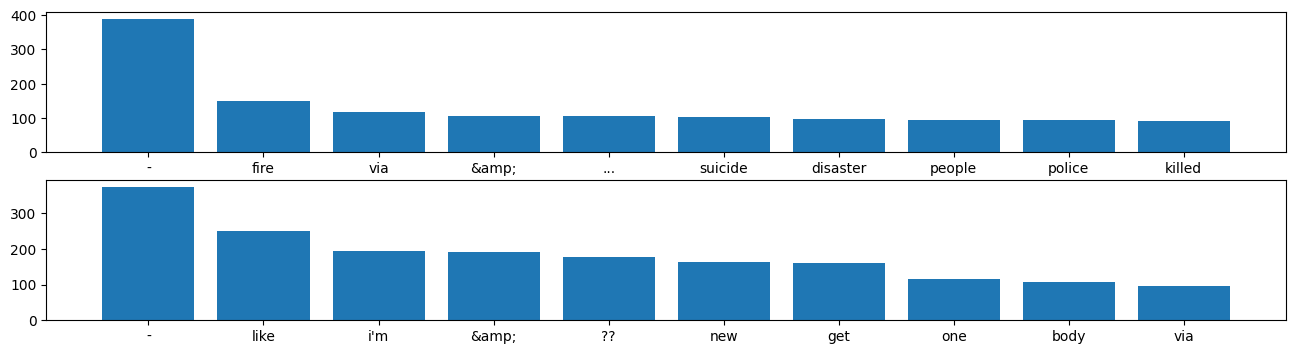

In [ ]:
d1 = df_disaster_unigrams[0][:10]
d2 = df_disaster_unigrams[1][:10]

nd1 = df_nondisaster_unigrams[0][:10]
nd2 = df_nondisaster_unigrams[1][:10]

plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
plt.bar(d1,d2)

plt.subplot(2,1,2)
plt.bar(nd1,nd2)

### Create bigrams

In [53]:
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for text in train_df[train_df.target == 1].text:
    for word in generate_ngrams(text,n_gram=2):
        disaster_bigrams[word] += 1
for text in train_df[train_df.target == 0].text:
    for word in generate_ngrams(text,n_gram=2):
        nondisaster_bigrams[word] += 1

df_disaster_bigrams = pd.DataFrame(
    sorted(disaster_bigrams.items(),key=lambda x: x[1])[::-1]
)
df_nondisaster_bigrams = pd.DataFrame(
    sorted(nondisaster_bigrams.items(),key=lambda x: x[1])[::-1]
)

In [ ]:
sorted(disaster_bigrams.items(),key=lambda x: x[1])[::-1]

d:\anaconda3\envs\tbcc\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
d:\anaconda3\envs\tbcc\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


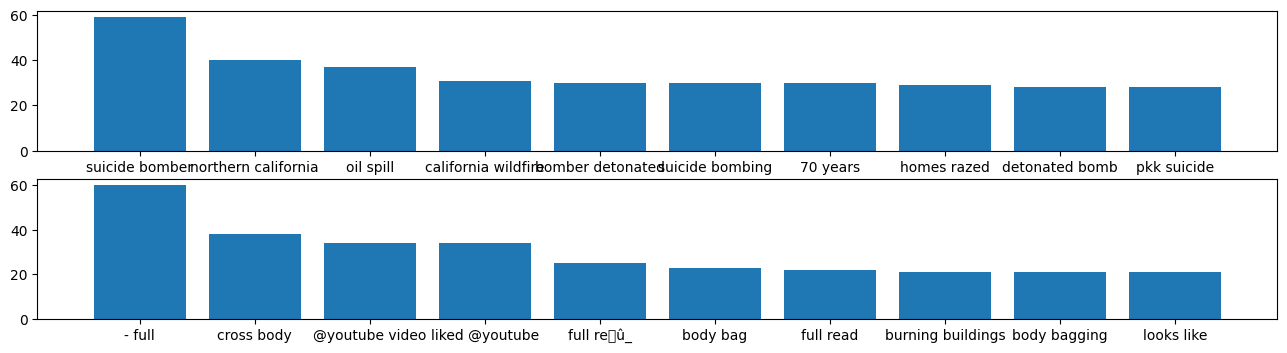

In [56]:
d1 = df_disaster_bigrams[0][:10]
d2 = df_disaster_bigrams[1][:10]

nd1 = df_nondisaster_bigrams[0][:10]
nd2 = df_nondisaster_bigrams[1][:10]

plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
plt.bar(d1,d2)

plt.subplot(2,1,2)
plt.bar(nd1,nd2);

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, ngrams=(1,1),nr=None):
    """
    Create a bag of ngrams and counts ngram frequency
    Returns a sorted list of tuples: (ngram,count)
    """
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],reverse=True)
    return words_freq[:nr]

In [61]:
top_text_bigrams = get_top_text_ngrams(train_df.text,ngrams=(2,2),nr=10)
top_text_bigrams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

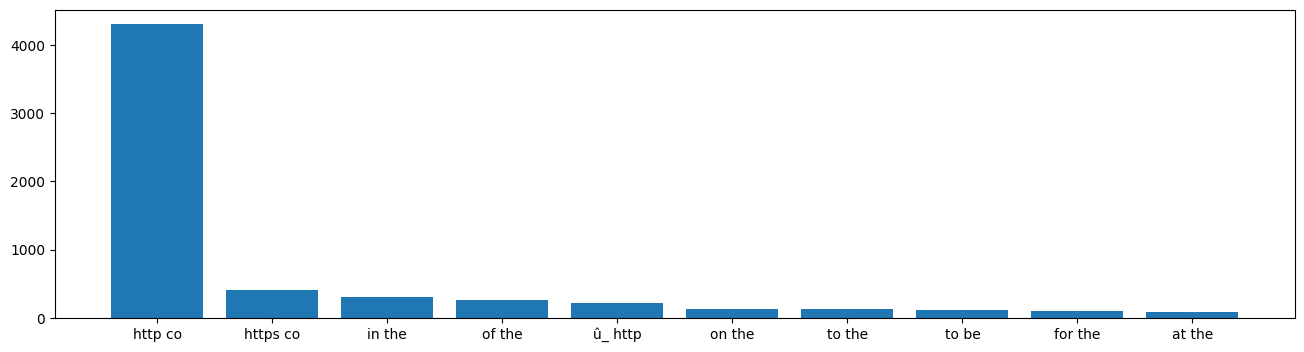

In [63]:
x, y = zip(*top_text_bigrams)
plt.figure(1,figsize=(16,4))
plt.bar(x,y);

In [64]:
def create_corpus(df,target):
    """
    Create corpus based on the target
    """
    corpus = []
    for x in df[df.target == target].text.str.split():
        for word in x:
            corpus.append(word)
    return corpus

In [65]:
stop = set(stopwords.words("english"))

corpus0 = create_corpus(train_df,target=0)
corpus1 = create_corpus(train_df,target=1)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] += 1
d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] += 1

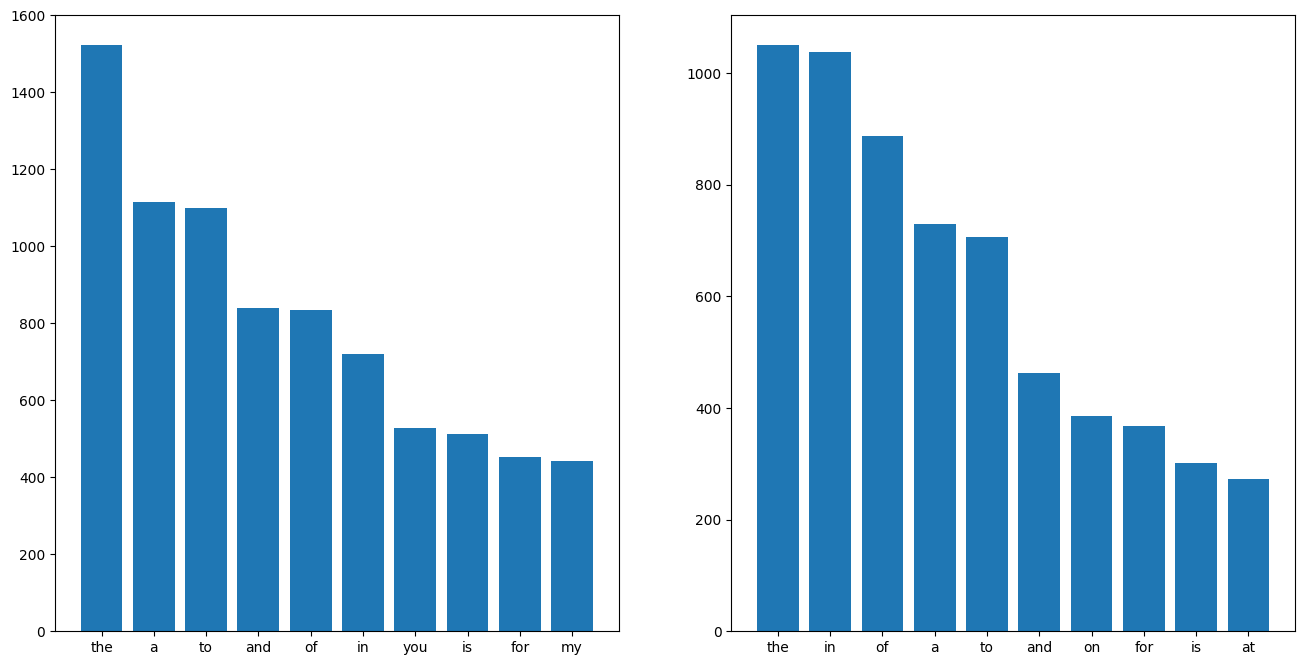

In [68]:
top0 = sorted(d0.items(),key=lambda x: x[1],reverse=True)[:10]
top1 = sorted(d1.items(),key=lambda x: x[1],reverse=True)[:10]

x0,y0 = zip(*top0)
x1,y1 = zip(*top1)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)

plt.subplot(1,2,2)
plt.bar(x1,y1);

In [69]:
import string

punc0 = defaultdict(int)
for word in corpus0:
    if word in string.punctuation:
        punc0[word] += 1
punc1 = defaultdict(int)
for word in corpus1:
    if word in string.punctuation:
        punc1[word] += 1

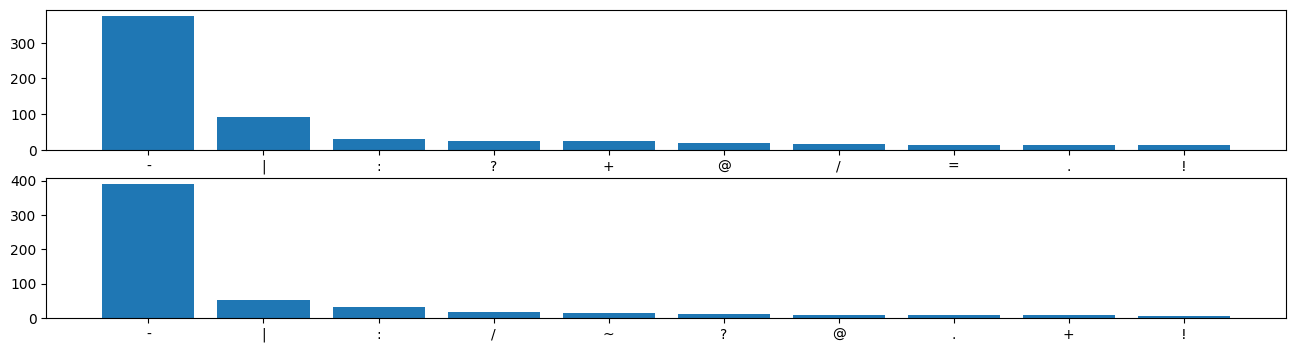

In [72]:
top0_punc = sorted(punc0.items(),key=lambda x: x[1],reverse=True)[:10]
top1_punc = sorted(punc1.items(),key=lambda x: x[1],reverse=True)[:10]

x0,y0 = zip(*top0_punc)
x1,y1 = zip(*top1_punc)

plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
plt.bar(x0,y0)

plt.subplot(2,1,2)
plt.bar(x1,y1);

In [121]:
import re

def remove_URL(t):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"",str(t))

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"",str(text))

In [122]:
def remove_punct(text):
    table = text.maketrans("","", string.punctuation)
    return text.translate(table)

In [133]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00012720-\U000127B0"
        u"\U000124C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"",str(text))

In [141]:
train_df["text"] = train_df.text.map(lambda x:remove_URL(x))
train_df["text"] = train_df.text.map(lambda x:remove_html(x))
train_df["text"] = train_df.text.map(lambda x:remove_punct(x))

In [139]:
train_df["text"] = train_df.text.map(lambda x:remove_emoji(x))

In [148]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text) 

In [150]:
train_df["text"] = train_df.text.map(lambda x:remove_stopwords(x))

In [152]:
from wordcloud import WordCloud

corpus0 = create_corpus(df=train_df,target=0)
corpus1 = create_corpus(df=train_df,target=1)

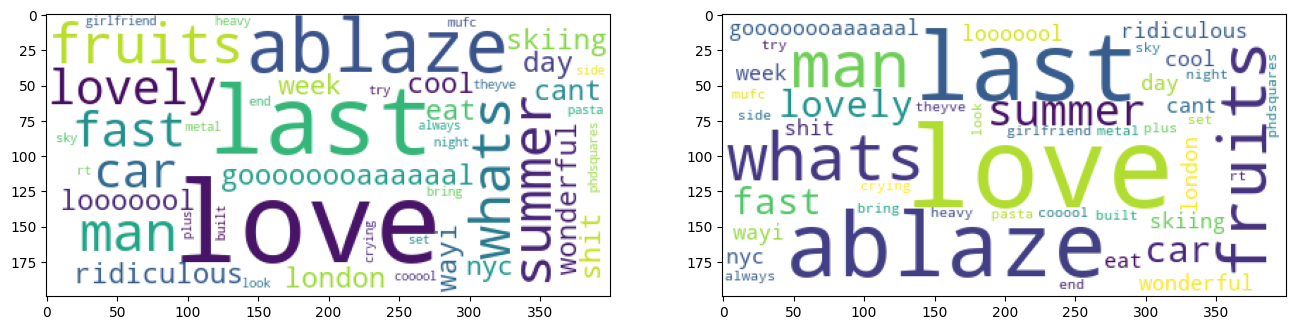

In [155]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)

plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(word_cloud0)

plt.subplot(1,2,2)
plt.imshow(word_cloud1);